## Problem -1 

### Use VS Code to run

In [80]:
from itertools import permutations

# Final State cost initialization - 6 elements - each final state is labled as sollows
# ABCDA - 0, ABDCA - 1, ACBDA - 2, ACDBA - 3, ADBCA - 4, ADCBA - 5
cost_to_go_final = []

# Initializing intermediary states - 6 branches at the level 2 of the tree
# Each list represent the 3 intermediary states of each branch i.e. branch 0 has AB, ABC, ABCD and branch 1 has AB, ABD, ABDC
intermediary_state_cost = [[], [], [], [], [], []]

city_list = ["A", "B", "C", "D"]

# Lable: "A" - 0, "B" - 1, "C" - 2, "D" - 3
# Defining dictionery to known costs
# Assume a = 0, i.e weight of BC and CB is 0
weight_matrix = [[0,2,1,1], [2,0,0,2], [1,0,0,2], [1,2,2,0]]

# Starting node is A
start = 0


In [81]:
def cost(start, weight_matrix):
    vertex = []
    index = 0
    nodes = len(city_list)

    for i in range(nodes):
        if i != start:
            vertex.append(i) # [1, 2, 3]

    possible_combinations = permutations(vertex) # [(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

    for combination in possible_combinations:
        cost_to_go = 0
        current_city = start

        for next_city in combination:
            cost_to_go = cost_to_go + weight_matrix[current_city][next_city]  # Iterating until root of one branch is reached
            intermediary_state_cost[index].append(cost_to_go)
            current_city = next_city
        
        index += 1


        # To reach the starting point
        cost_to_go = cost_to_go + weight_matrix[current_city][start]
        
        cost_to_go_final.append(cost_to_go)


In [82]:
cost(start, weight_matrix)
print(cost_to_go_final)
print(intermediary_state_cost)

[5, 7, 4, 7, 4, 5]
[[2, 2, 4], [2, 4, 6], [1, 1, 3], [1, 3, 5], [1, 3, 3], [1, 3, 3]]


***

intermediary_state_cost = [ [2, 2, 4], [2, 4, 6], [1, 1, 3], [1, 3, 5], [1, 3, 3], [1, 3, 3 ]

intermediary_state_cost = [ [AB,ABC, ABCD], [AB, ABD, ABDC], [AC, ACB, ACBD], [AC, ACD, ACDB], [AD, ADB, ADBC], [AD, ADC, ADCB] ]

***

The final state costs of the final states 0(ABCDA), 2(ACBDA), 4(ADBCA), 5(ADCBA) are incomplete since the variable a is unknown and is assumed to be zero

The costs of final states 1(ABDCA), 3(ACDBA) are complete

***

## Problem 2

In [83]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

occupancy_map_img = Image.open('occupancy_map.png')

# Interpret this image as a numpy array, and threshold its values to,→ {0,1}
occupancy_grid = (np.asarray(occupancy_map_img) > 0).astype(int)

np.savetxt('test.csv', occupancy_grid, delimiter = ',')

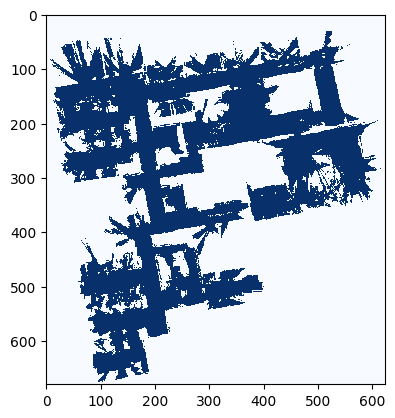

In [84]:
fig = plt.figure()
plt.imshow(occupancy_grid, cmap = "Blues", interpolation="none")

# Part a: A* search:
***
(i) Implement the RecoverPath function

In [85]:
def recoverPath(s,g,pred):
    optimal_path = []
    current_vertex = g
    
    while current_vertex != s:
        optimal_path.append(current_vertex)
        current_vertex = pred[current_vertex]
    optimal_path.append(s)
    optimal_path.reverse()
    return optimal_path


(ii) Implement the complete A* search algorithm

In [86]:
import sys
import heapq

def a_star(v_set,start,goal,N,w,h):
    cost_to = {}
    est_total_cost = {}
    pred = {}

    for v in v_set:
        cost_to[v] = sys.maxsize
        est_total_cost[v] =  sys.maxsize
    
    cost_to[start] = 0
    est_total_cost[start] = h(start,goal)

    q = [(est_total_cost[start],start)]
    heapq.heapify(q)

    while len(q) != 0:
        v = heapq.heappop(q)[1]
        dic = {e[0]:e[1] for e in q}
        
        if v == goal:
            return recoverPath(start,goal,pred)
        
        for i in N(v):
            pvi = cost_to[v] + w(v,i)
            if pvi < cost_to[i]:
                pred[i] = v
                cost_to[i] = pvi
                est_total_cost[i] = pvi + h(i, goal)
                
                if i in [e[1] for e in q]:
                    #print(e for e in q if e[1] == i)
                    #q.remove(e for e in q if e[1] == i)
                    for e in q:
                        if e[1] == i:
                            q.remove(e)
                    heapq.heapify(q)
                    heapq.heappush(q, (est_total_cost[i],i))
                else:
                    heapq.heappush(q, (est_total_cost[i],i))
    return []


# Part b: Route planning in occupancy grids with A* search:
***
 (i) Implement N(v)

In [87]:
def N(v):
    n = []
    
    if occupancy_grid[v[0]+1][v[1]] == 1:
        n.append((v[0]+1,v[1]))

    if occupancy_grid[v[0]-1][v[1]] == 1:
        n.append((v[0]-1,v[1]))

    if occupancy_grid[v[0]][v[1]+1] == 1:
        n.append((v[0],v[1]+1))

    if occupancy_grid[v[0]][v[1]-1] == 1:
        n.append((v[0],v[1]-1))

    if occupancy_grid[v[0]+1][v[1]+1] == 1:
        n.append((v[0]+1,v[1]+1))

    if occupancy_grid[v[0]+1][v[1]-1] == 1:
        n.append((v[0]+1,v[1]-1))

    if occupancy_grid[v[0]-1][v[1]+1] == 1:
        n.append((v[0]-1,v[1]+1))
 
    if occupancy_grid[v[0]-1][v[1]-1] == 1:
        n.append((v[0]-1,v[1]-1))
    
    return n

(ii) Implement a function d: V × V → R+ that accepts as input the tuples v1 and v2, and returns this
Euclidean distance.

In [88]:
import math

def distance(v1,v2):
    return math.dist(v1,v2)

(iii) Using your implementations of d, N, and A∗ search, find the shortest path in the occupancy
grid Fig. 3b from the starting point s = (635, 140) to the goal g = (350, 400)
[assuming 0-based indexing for rows and columns, as is standard in CS.] Plot this
optimal path overlaid on the image, and calculate its total length.

In [89]:
s = (635, 140)
g = (350, 400)

# Get all the vetices of free space
v_set = [(i,j) for i in range(len(occupancy_grid)) for j in range(len(occupancy_grid[i])) if occupancy_grid[i][j] == 1]

# Compute shortest path
shortest_path = a_star(v_set,s,g,N,distance,distance)

y = [x[0] for x in shortest_path]
x = [x[1] for x in shortest_path]

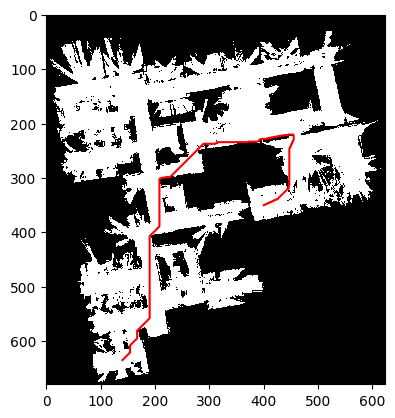

In [90]:
fig = plt.figure()
plt.imshow(occupancy_grid, cmap = "binary_r", interpolation="none")
plt.plot(x,y,'r')


Distance of the path

In [91]:
# Shortest posssible distance

print("Shortest possible distance: ",distance(s,g))

# Total distance covered by the optimal path

distance_covered = 0

for i in range(len(shortest_path)-1):
    distance_covered += distance(shortest_path[i],shortest_path[i+1])
print("Distance covered by shortest possible path: ",distance_covered)

Shortest possible distance:  385.77843381920667
Distance covered by shortest possible path:  803.1147904132627


***

# Part c: Route planning with probabilistic roadmaps:
***
(i) Implement a function that accepts as input the occupancy grid map M, and returns
a vertex v = (r, c) sampled uniformly randomly from the free space in M.

In [92]:
from numpy import random

# Generate random vertices within the size of occupance grid

def get_v(m):
    
    while True:
        v_x =  int(random.uniform(0,680))
        v_y =  int(random.uniform(0,623))
        if m[v_x][v_y] == 1:
            break
    return [v_x,v_y]

(ii) Implement a function that performs this reachability check. Your function should
accept as input the occupancy grid map M and two grid cells v1 = (r1, c1) and
v2 = (r2, c2), and return a Boolean value indicating whether the line segment joining
v1 and v2 in M is obstacle-free.

In [93]:
# Bresenham library is used to get all the possible vertices
# that are in the line that connects v1(x1,y1) and v2(x2,y2)

# Those vertices are checked if thry are inside the free zone
# If not return False, else return True

from bresenham import bresenham  as br

def check_edge(m,v1,v2):

    path_list = list(br(v1[0], v1[1], v2[0], v2[1]))
    for v in path_list:
        if m[v[0]][v[1]] == 0:
            return False
    return True

In [94]:
# Computing eucledian distance

def eucledian_dist(v1,v2):
    return math.sqrt(((v2[1] - v1[1]) ** 2) + ((v2[0] - v1[0]) ** 2))


(iii) Implement Algorithm 2 in the form of a function that
accepts as input an occupancy grid map M, the desired number of samples N, and
the maximum local search radius dmax, and returns a PRM G constructed from M.

In [109]:
# Import the NetworkX library
import networkx as nx

node_count = 0

# Choose n no. of random nodes that are in the free space of occupancy grid m
# Add that node to the graph G
def construct_prm(m,d_max,n):
    G = nx.Graph()
    global node_count
    for k in range(n):
        v_new = get_v(m)
        node_count += 1
        add_vertex(G, v_new, d_max)
        
    return G

# Add new node to G
# Find if an edge is possible between the new node and existing node based on d_max
# If yes add new edge between those nodes

def add_vertex(G, v_new, d_max):

    G.add_node(node_count, pos = (v_new[0], v_new[1]))
    for key,node in nx.get_node_attributes(G,'pos').items():
        if list(node) == v_new:
            continue
        else:
            if eucledian_dist(node,v_new) <= d_max and check_edge(occupancy_grid,node,v_new):
                G.add_edge(key, node_count, weight= eucledian_dist(node,v_new))

        



(iv) Construct a PRM on the occupancy grid
in Fig. 3b with N = 2500 samples and a maximum local search radius of dmax = 75
voxels. Plot the resulting graph overlaid on Fig. 3b.

In [110]:
# Construct a PRM
G = construct_prm(occupancy_grid,75,2500)

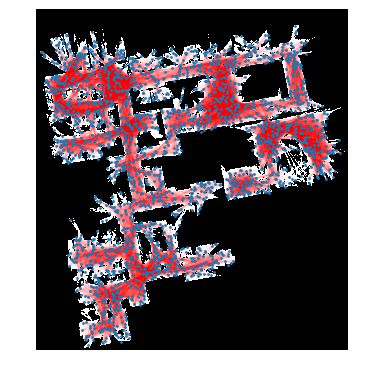

In [111]:
plt.imshow(occupancy_grid, cmap = "binary_r", interpolation="none")

nx.draw(G, pos = {key:(value[1],value[0]) for key,value in nx.get_node_attributes(G,'pos').items()}, node_size = 1, width = 0.009, edge_color= "r")

plt.show()


(v) Using the PRM you constructed in part (v), find a path from s = (635, 140) to
g = (350, 400). [Note: If s and g initially lie in separate connected components of G,
you may need to sample and add more vertices to G until s and g are path-connected.]
Plot this path overlaid on Fig. 3b, and calculate its total length

In [112]:

def shortest_path_in_PRM(start,goal):
    global node_count
    global G

    s = [key for key, value in nx.get_node_attributes(G,'pos').items() if list(value) == start]
    g = [key for key, value in nx.get_node_attributes(G,'pos').items() if list(value) == goal]

    # If Start node does not exist in PRM add it as a new node to G
    if len(s) == 0:
        node_count += 1
        add_vertex(G, start, 75)
        s = [key for key, value in nx.get_node_attributes(G,'pos').items() if list(value) == start]


    # If Goal node does not exist in PRM add it as a new node to G
    if len(g) == 0:
        node_count += 1
        add_vertex(G, goal, 75)
        g = [key for key, value in nx.get_node_attributes(G,'pos').items() if list(value) == goal]


    path = nx.astar_path(G, s[0], g[0])
    return path
    


In [113]:
s = [635, 140]
g = [350, 400]

path = []

path = shortest_path_in_PRM(s,g)

2502


The vertices are connected in the image through occupied space, the edge implies that there is a path connecting those vertices. The edge does not represent the literal path. We know that because all the nodes in graph is connected if and only if the line connecting those nodes is completely in free space

[635, 614, 592, 546, 521, 475, 408, 379, 317, 292, 264, 253, 237, 230, 227, 214, 223, 265, 319, 328, 350] [140, 154, 162, 185, 192, 192, 190, 193, 196, 214, 259, 266, 285, 357, 379, 450, 458, 454, 449, 414, 400]


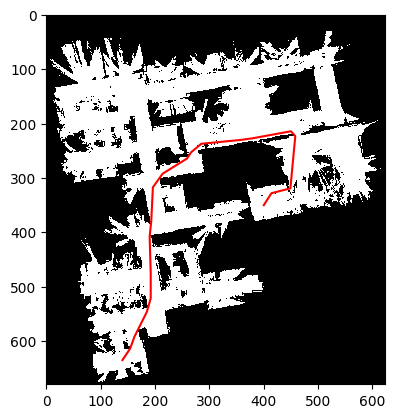

In [115]:
plt.imshow(occupancy_grid, cmap = "binary_r", interpolation="none")


y = [G.nodes[x]['pos'][1] for x in path]
x = [G.nodes[x]['pos'][0] for x in path]
print(x,y)
plt.plot(y,x,'r')

Total Length

In [116]:

distance_covered = 0

for i in range(len(path)-1):
    distance_covered += eucledian_dist((x[i],y[i]),(x[i+1],y[i+1]))
print("Distance covered by shortest possible path: ",distance_covered)

Distance covered by shortest possible path:  789.3816774747326
